In [1]:
import sys
assert sys.version_info > (3,5)
# to mention that we need python 3.5 or above
import sklearn
assert sklearn.__version__ >= "0.20"
# to mention that we need version 0.2 and above for5 sklearn
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request
%matplotlib inline
import matplotlib as mpl 
import matplotlib.pyplot as plt


In [2]:
#loading dataset mushroom.csv into a variable
dataset = pd.read_csv('mushroom.csv')
#printing the head ~ first 5 entries 
print(dataset.head())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

In [3]:
#info about the data types of the dataset
print(dataset.info())
#the output suggests that there are no null values this function is use full for checking the data types and if there are
#any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
#countes the number of instances in each class
#number of edible examples is 4208
#number of poisonous examples is 3916
# to do cut eqaulise
classes = dataset['class'].value_counts()
print("number of classes ",classes)

number of classes  e    4208
p    3916
Name: class, dtype: int64


In [5]:
print(dataset.describe())

       class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top    

In [6]:
# replacing the "e" that represents "edible" mushrooms with 1
# replacing the "p" that represents "poisonous" mushrooms with 0
dataset["class"].replace(['e','p'], [0,1], inplace=True)
# replacing in the following order bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
dataset['cap-shape'].replace(['b','c','x','f','k','s'], [0,1,2,3,4,5], inplace=True)
# replacing in the following order fibrous=f,grooves=g,scaly=y,smooth=s
dataset['cap-surface'].replace(['f','g','y','s'],[0,1,2,3], inplace=True)
#replcaing in the following order brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
dataset['cap-color'].replace(['n','b','c','g','r','p','u','e','w','y'],[0,1,2,3,4,5,6,7,8,9], inplace=True)
#replacing in the following order bruises=t,no=f
dataset['bruises'].replace(['t','f'],[0,1],inplace=True)
#replace in the following order almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
dataset['odor'].replace(['a','l','c','y','f','m','n','p','s'],[0,1,2,3,4,5,6,7,8],inplace=True)
#replace in order of the following attached=a, descending=d, free=f, notched=n
dataset['gill-attachment'].replace(['a','d','f','n'],[0,1,2,3], inplace=True)
#replace in order of the following close=c,crowded=w,distant=d
dataset['gill-spacing'].replace(['c','w','d'],[0,1,2],inplace=True)
#replcace in order of the following broad=b,narrow=n
dataset['gill-size'].replace(['b','n'],[0,1],inplace=True)
#replace in order of the following black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
dataset['gill-color'].replace(['k','n','b','h','g','r','o','p','u','e','w','y'],[0,1,2,3,4,5,6,7,8,9,10,11],inplace=True)
#replace in order of the following stalk-shape: enlarging=e,tapering=t
dataset['stalk-shape'].replace(['e','t'],[0,1],inplace=True)
#replace in order of the following stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
dataset['stalk-root'].replace(['b','c','u','e','z','r','?'],[0,1,2,3,4,5,6],inplace=True)
#replace in order of the following stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
dataset['stalk-surface-above-ring'].replace(['f','y','k','s'],[0,1,2,3],inplace=True)
#replcae in order of the following stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
dataset['stalk-surface-below-ring'].replace(['f','y','k','s'],[0,1,2,3],inplace=True)
#replace in order of the following stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
dataset['stalk-color-above-ring'].replace(['n','b','c','g','o','p','e','w','y'],[0,1,2,3,4,5,6,7,8],inplace=True)
#replace in order of the following stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
dataset['stalk-color-below-ring'].replace(['n','b','c','g','o','p','e','w','y'],[0,1,2,3,4,5,6,7,8],inplace=True)
#replace in order of the following veil-type: partial=p,universal=u
dataset['veil-type'].replace(['p','u'],[0,1],inplace=True)
#replcae in order of the following veil-color: brown=n,orange=o,white=w,yellow=y
dataset['veil-color'].replace(['n','o','w','y'],[0,1,2,3],inplace=True)
#replace in order of the following ring-number: none=n,one=o,two=t
dataset['ring-number'].replace(['n','o','t'],[0,1,2],inplace=True)
#replace in order of the following ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
dataset['ring-type'].replace(['c','e','f','l','n','p','s','z'],[0,1,2,3,4,5,6,7],inplace=True)
#replace in order of the following spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
dataset['spore-print-color'].replace(['k','n','b','h','r','o','u','w','y'],[0,1,2,3,4,5,6,7,8],inplace=True)
#replace in order of the following population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
dataset['population'].replace(['a','c','n','s','v','y'],[0,1,2,3,4,5],inplace=True)
#replace in the order of the following habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d
dataset['habitat'].replace(['g','l','m','p','u','w','d'],[0,1,2,3,4,5,6],inplace=True)

In [7]:
# checking if the values have changed 
classes = dataset['class'].value_counts()
print("number of classes ",classes)
print(dataset.info())

number of classes  0    4208
1    3916
Name: class, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  81

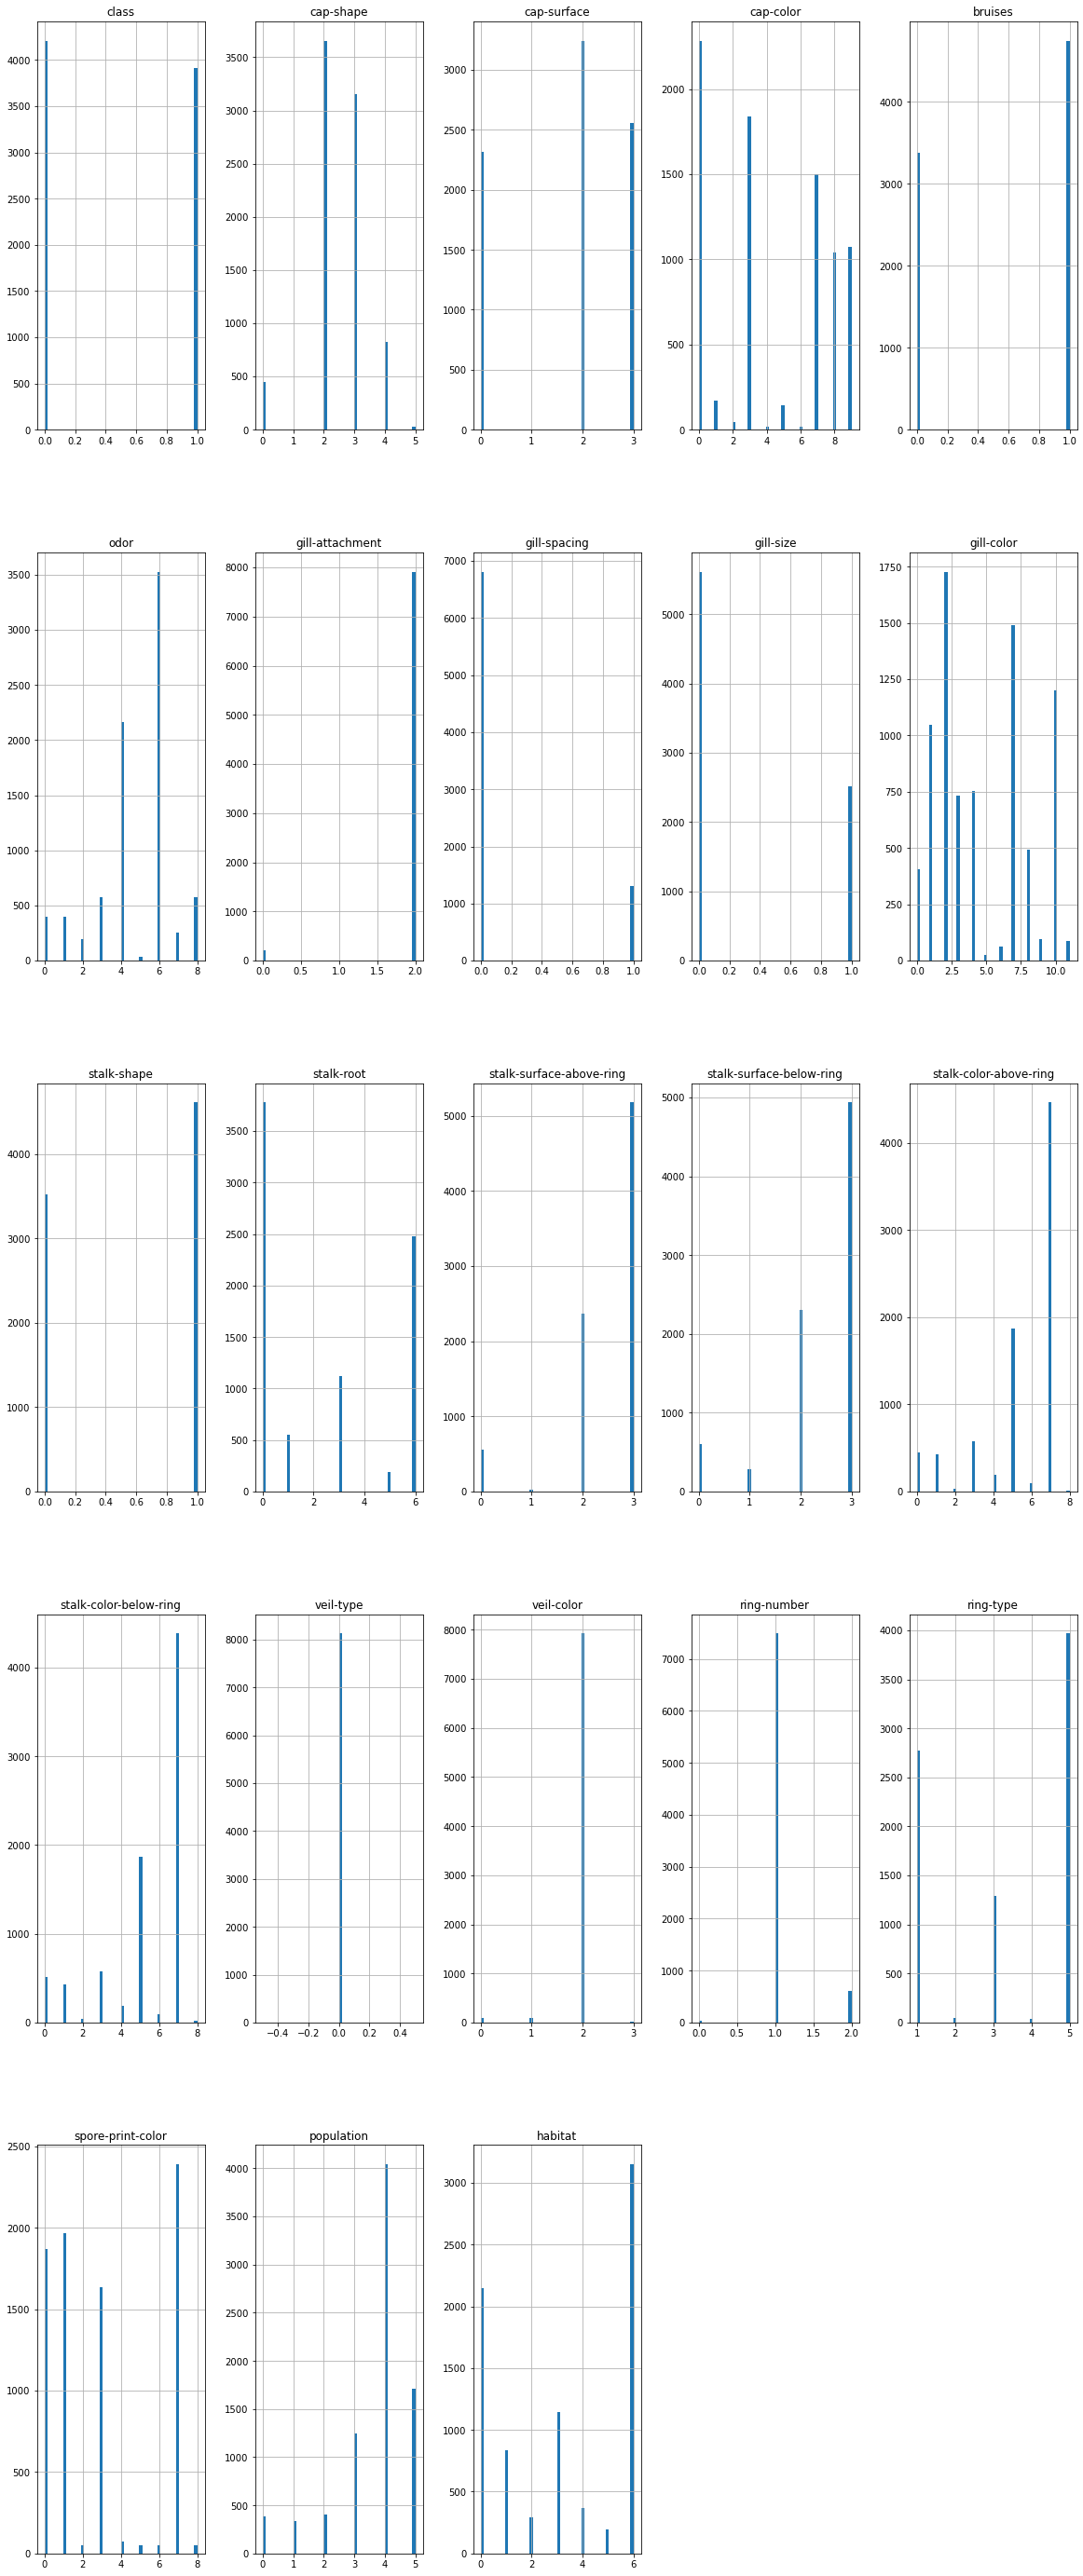

In [8]:
dataset.hist(bins=50, figsize=(20,50))
plt.show()

<AxesSubplot:xlabel='class', ylabel='odor'>

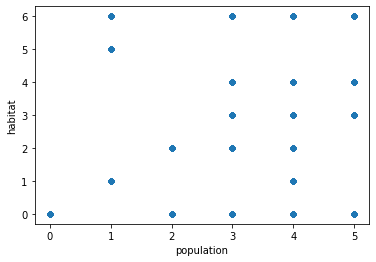

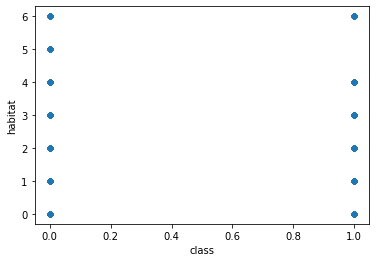

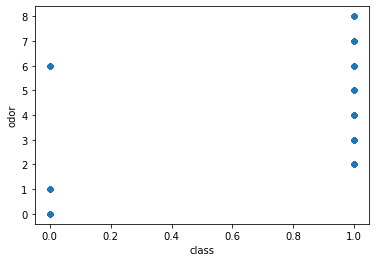

In [9]:
#visualising the classes edible and poisonous in with respect to the habitats they are found in 
dataset.plot(kind="scatter",x="population",y="habitat")
dataset.plot(kind="scatter",x="class",y="habitat")
dataset.plot(kind="scatter", x="class",y="odor")


<AxesSubplot:xlabel='cap-shape', ylabel='count'>

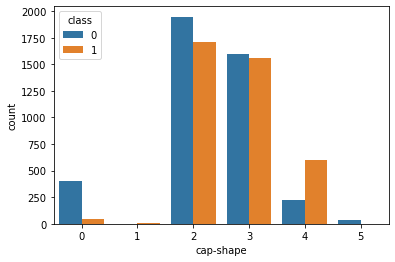

In [13]:
import seaborn as sns
#sns.catplot(data=dataset, x="cap-shape", y="class", hue="class")
sns.countplot(data=dataset, x="cap-shape", hue="class")


<AxesSubplot:xlabel='cap-surface', ylabel='count'>

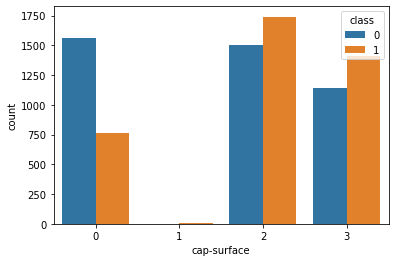

In [14]:
sns.countplot(data=dataset, x="cap-surface", hue="class")
#remove

<AxesSubplot:xlabel='cap-color', ylabel='count'>

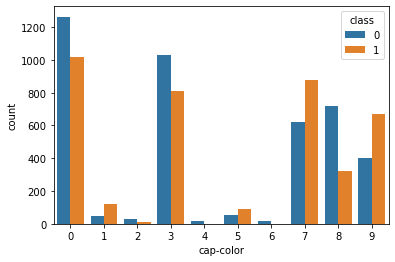

In [15]:
sns.countplot(data=dataset, x="cap-color", hue="class")

<AxesSubplot:xlabel='odor', ylabel='count'>

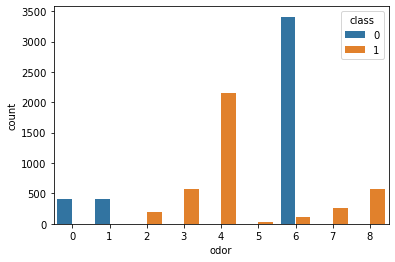

In [16]:
sns.countplot(data=dataset, x="odor", hue="class")

<AxesSubplot:xlabel='gill-attachment', ylabel='count'>

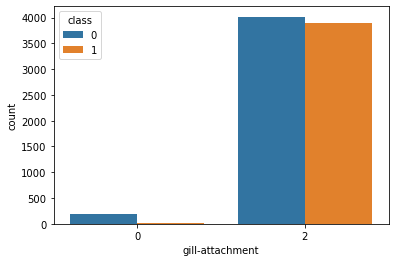

In [17]:
sns.countplot(data=dataset, x="gill-attachment", hue="class")
#remove

<AxesSubplot:xlabel='gill-spacing', ylabel='count'>

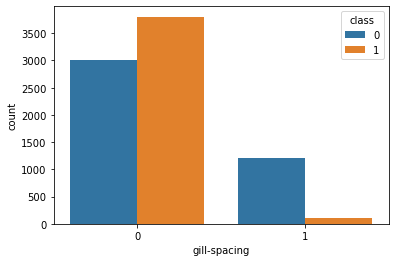

In [18]:
sns.countplot(data=dataset, x="gill-spacing", hue="class")

In [19]:
correlation_matrix = dataset.corr()
print(correlation_matrix)

                             class  cap-shape  cap-surface  cap-color  \
class                     1.000000   0.199488     0.186806   0.058452   
cap-shape                 0.199488   1.000000    -0.007059  -0.176574   
cap-surface               0.186806  -0.007059     1.000000  -0.022923   
cap-color                 0.058452  -0.176574    -0.022923   1.000000   
bruises                   0.501530   0.199703     0.019547  -0.034513   
odor                     -0.086800   0.251055    -0.105749  -0.318907   
gill-attachment           0.129200   0.032099    -0.161757   0.192322   
gill-spacing             -0.348387  -0.061368    -0.096076   0.023269   
gill-size                 0.540024   0.259001     0.274933  -0.091914   
gill-color               -0.270247  -0.069180    -0.122924  -0.020306   
stalk-shape              -0.102019   0.248495     0.037139  -0.240248   
stalk-root                0.172458   0.217526     0.389001  -0.168909   
stalk-surface-above-ring -0.215088  -0.070942     0

<AxesSubplot:xlabel='gill-size', ylabel='count'>

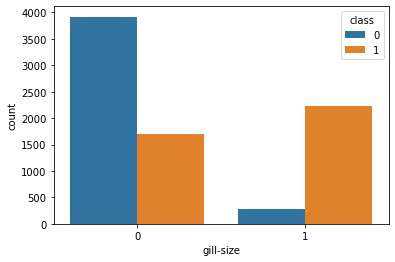

In [20]:
sns.countplot(data=dataset, x="gill-size", hue="class")

<AxesSubplot:xlabel='gill-color', ylabel='count'>

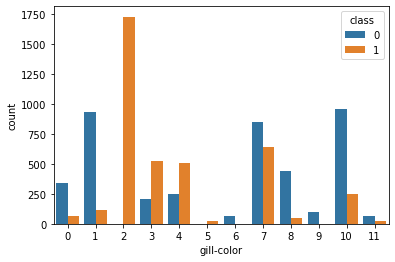

In [21]:
sns.countplot(data=dataset, x="gill-color", hue="class")

<AxesSubplot:xlabel='stalk-shape', ylabel='count'>

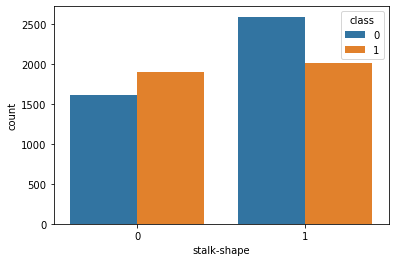

In [22]:
sns.countplot(data=dataset, x="stalk-shape", hue="class")
#remove

<AxesSubplot:xlabel='stalk-root', ylabel='count'>

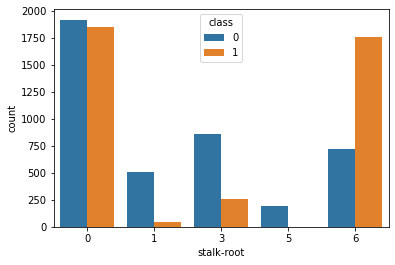

In [23]:
sns.countplot(data=dataset, x="stalk-root", hue="class")

<AxesSubplot:xlabel='stalk-surface-above-ring', ylabel='count'>

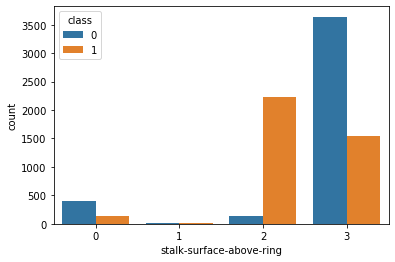

In [24]:
sns.countplot(data=dataset, x="stalk-surface-above-ring", hue="class")

<AxesSubplot:xlabel='stalk-surface-below-ring', ylabel='count'>

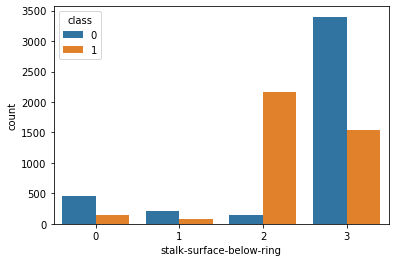

In [25]:
sns.countplot(data=dataset, x="stalk-surface-below-ring", hue="class")

<AxesSubplot:xlabel='stalk-color-above-ring', ylabel='count'>

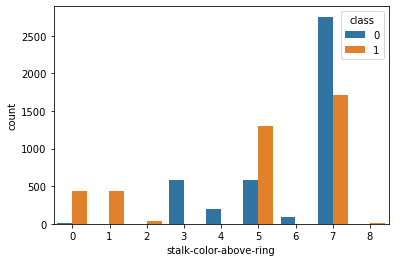

In [26]:
sns.countplot(data=dataset, x="stalk-color-above-ring", hue="class")

<AxesSubplot:xlabel='stalk-color-below-ring', ylabel='count'>

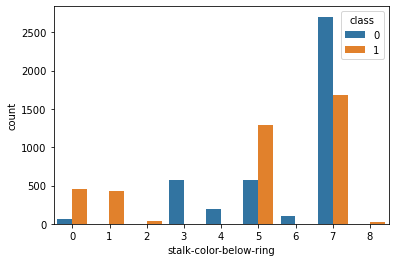

In [27]:
sns.countplot(data=dataset, x="stalk-color-below-ring", hue="class")

<AxesSubplot:xlabel='veil-type', ylabel='count'>

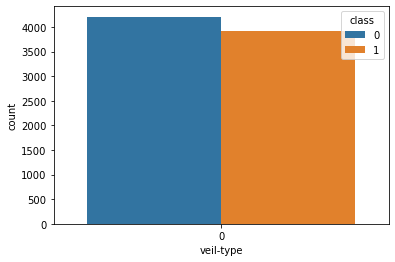

In [28]:
sns.countplot(data=dataset, x="veil-type", hue="class")
#remove

<AxesSubplot:xlabel='veil-color', ylabel='count'>

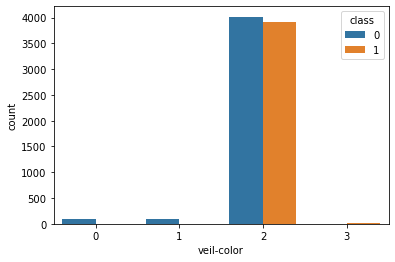

In [29]:
sns.countplot(data=dataset, x="veil-color", hue="class")
#remove

<AxesSubplot:xlabel='ring-number', ylabel='count'>

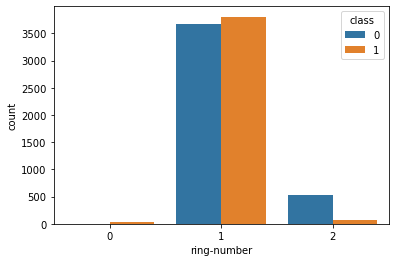

In [30]:
sns.countplot(data=dataset, x="ring-number", hue="class")
#remove

<AxesSubplot:xlabel='ring-type', ylabel='count'>

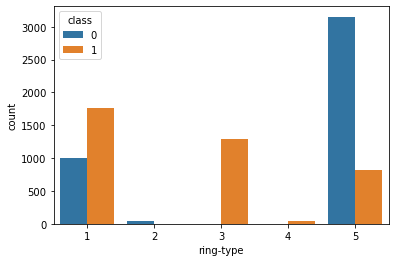

In [31]:
sns.countplot(data=dataset, x="ring-type", hue="class")

<AxesSubplot:xlabel='spore-print-color', ylabel='count'>

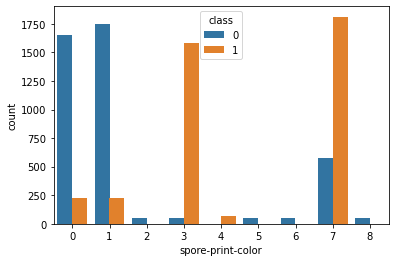

In [32]:
sns.countplot(data=dataset, x="spore-print-color", hue="class")

<AxesSubplot:xlabel='population', ylabel='count'>

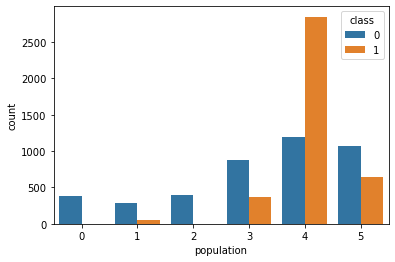

In [33]:
sns.countplot(data=dataset, x="population", hue="class")

<AxesSubplot:xlabel='habitat', ylabel='count'>

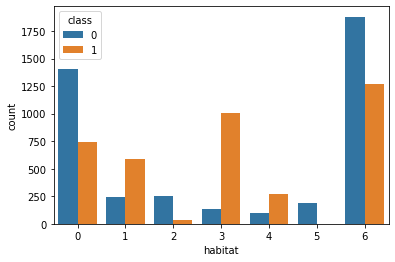

In [34]:
sns.countplot(data=dataset, x="habitat", hue="class")

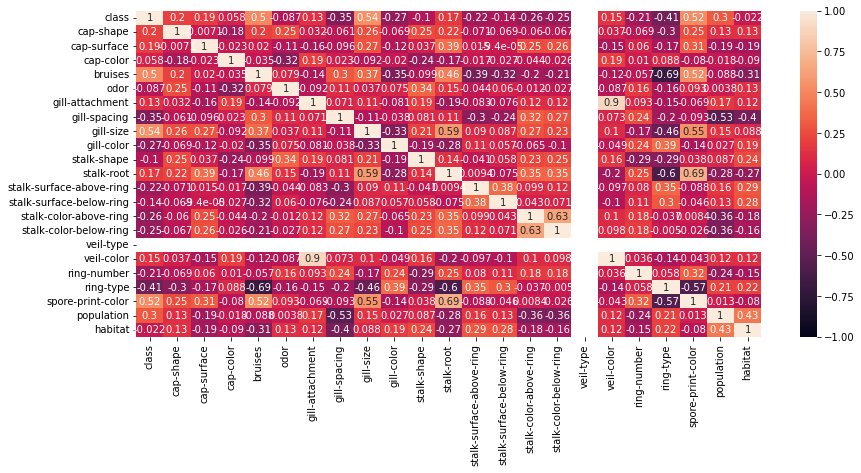

In [35]:
plt.figure(figsize=(14,6))
heatmap = sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=True)

In [36]:
#new dataset creation with top 2 features
#gill size corelation coeffitient = 0.54
#spore print color corelation coeffitient = 0.52
#number of features 2*2 = 4
top2_dataset = dataset[["gill-size","spore-print-color"]]
print(top2_dataset.head())

   gill-size  spore-print-color
0          1                  0
1          0                  1
2          0                  1
3          1                  0
4          0                  1


In [37]:
#new dataset with top 5 features
#gill size corelation coeffitient = 0.54
#spore-print-color corelation coeffitient = 0.52
#ring type corelation coeffitient = -0.41
#gill-spacing correlation coeffitient = -0.35
#bruisis corelation coeffitient = 0.5
#number of features 5*2 = 10
top5_dataset = dataset[["gill-size","spore-print-color","ring-type","gill-spacing","bruises"]]
print(top5_dataset.head())

   gill-size  spore-print-color  ring-type  gill-spacing  bruises
0          1                  0          5             0        0
1          0                  1          5             0        0
2          0                  1          5             0        0
3          1                  0          5             0        0
4          0                  1          1             1        1


In [38]:
#new dataset with top 10 features 
#gill size corelation coeffitient = 0.54
#spore-print-color corelation coeffitient = 0.52
#ring type corelation coeffitient = -0.41
#gill-spacing correlation coeffitient = -0.35
#bruisis corelation coeffitient = 0.5
#population corelation coeffitient = 0.30
#gill-color corelation coeffitient = -0.27
#stalk-color-above-ring corelation coeffitient = -0.26
#stalk-surface-above-ring corelation coeffitient = -0.22
#cap-shape corelation coeffittient = 0.2
#number of features 10*2 = 20
top10_dataset = dataset[["gill-size","spore-print-color","ring-type","gill-spacing","bruises","population","gill-color","stalk-color-above-ring","stalk-surface-above-ring","cap-shape"]]
print(top10_dataset.head())

   gill-size  spore-print-color  ring-type  gill-spacing  bruises  population  \
0          1                  0          5             0        0           3   
1          0                  1          5             0        0           2   
2          0                  1          5             0        0           2   
3          1                  0          5             0        0           3   
4          0                  1          1             1        1           0   

   gill-color  stalk-color-above-ring  stalk-surface-above-ring  cap-shape  
0           0                       7                         3          2  
1           0                       7                         3          2  
2           1                       7                         3          0  
3           1                       7                         3          2  
4           0                       7                         3          2  


In [39]:
#importing test train split funtion from sikit learn 
from sklearn.model_selection import train_test_split
#creating label subset
labels = dataset[["class"]]
X = top2_dataset
y = labels
#executing the function 
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.25)

In [40]:
#impoorting linear regression model from siket learn 
from sklearn import preprocessing, svm
from sklearn.linear_model import LogisticRegression
regr = LogisticRegression()
regr.fit(X_train,y_train)
print(regr.score(X_test,y_test))

0.6809453471196455


C:\Users\jagme\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
print("head of test feature")
X_test.head()


head of test feature


,gill-size,spore-print-color
5917,0,7
1308,0,1
7055,1,7
192,0,1
4971,0,3


In [42]:
print("head of test label")
y_test.head()

head of test label


,class
5917,0
1308,0
7055,1
192,0
4971,1


In [43]:
from sklearn.metrics import accuracy_score
predict1 = regr.predict(X_test)
acc1 = accuracy_score(y_test, predict1)
accuracy_score(y_test, predict1)

0.6809453471196455

In [44]:
X2 = top5_dataset
y2 = labels
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25)


In [45]:
regr2 = LogisticRegression()
regr2.fit(X_train2,y_train2)
print(regr2.score(X_test2,y_test2))

0.9025110782865583


C:\Users\jagme\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
predict2 = regr2.predict(X_test2)
acc2 = accuracy_score(y_test2, predict2)
accuracy_score(y_test2, predict2)


0.9025110782865583

In [47]:
X3 = top10_dataset
y3 = labels
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.25)
regr3 = LogisticRegression()
regr3.fit(X_train3,y_train3)
print(regr3.score(X_test3,y_test3))

0.9345150172328902


C:\Users\jagme\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
predict3 = regr3.predict(X_test3)
acc3 = accuracy_score(y_test3,predict3)
accuracy_score(y_test3,predict3)

0.9345150172328902

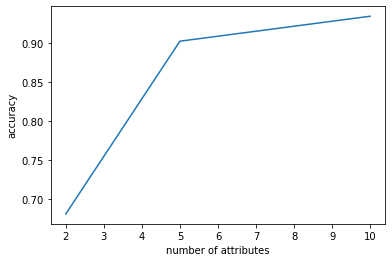

In [49]:
yAxis = [acc1, acc2, acc3]
xAxis = [2,5,10]
plt.xlabel('number of attributes')
plt.ylabel('accuracy')
plt.plot(xAxis,yAxis)
plt.show()
#this graph shows that the accuracy incresed with the increase in number of attributes

naive bayes multinominal model with the top to features being uysed as dataset
Accuracy :  0.7543082225504677


C:\Users\jagme\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jagme\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


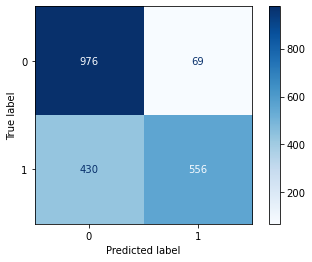

C:\Users\jagme\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Sensitivity: 0.6941678520625889 specificity: 0.8896 precision: 0.9339712918660287 recall: 0.6941678520625889
area under curve : 0.6010501082135543


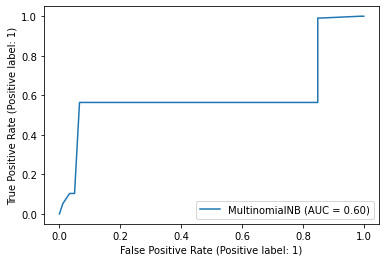

In [50]:
# Naives bayes 
# constructing a naive bayes multinominal model for each of the top2_dataset, top5_dataset, top10_dataset
# Multinominal naive bayes is a classifyer mainly used to classify classes with discrete features 
# example word count or text classification 
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
Mnb = MultinomialNB()
Mnb.fit(X_train,y_train)
# the accuracy score
Mnb.score(X_test,y_test)
# the accuracy
y_MNBP = Mnb.predict(X_test)
print('naive bayes multinominal model with the top to features being uysed as dataset')
print("Accuracy : ", metrics.accuracy_score(y_test,y_MNBP))
# obtaining the confusiuon matrix
# used for representing the performacne of a classification model 
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_MNBP)
TP = conf_matrix[0][0]
TN = conf_matrix[1][1]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
# plotting the confusion matrix
metrics.plot_confusion_matrix(Mnb, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
# calculating the sensitivity
s = TP/(TP+FN)
# calculating the specificity
sp = TN/(TN+FP)
# calculating the precision 
p = TP/(TP+FP)
# calculating the recall 
r = TP/(TP+FN)
print("Sensitivity:", s, "specificity:", sp, "precision:", p, "recall:", r)
# Area under ROC curve
metrics.plot_roc_curve(Mnb,X_test,y_test)
# area under the ROC shows represents how much the model is capable to distinguish between classes
# the higher the AUC value the better the model at classification
prob = Mnb.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test,prob)
print("area under curve :", auc)

Precision: 0.8839427662957074
Accuracy: 0.7569341867717052
Recall: 0.5692832764505119
Specificity: 0.930761934871957
F1_score: 0.6925472285654971
TP : 976  TN : 556  FP : 69  FN : 430


C:\Users\jagme\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jagme\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


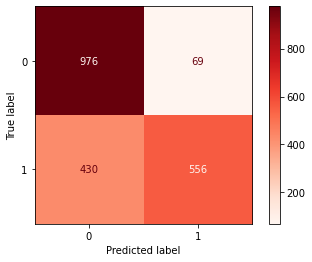

C:\Users\jagme\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


area under curve : 0.6010501082135543


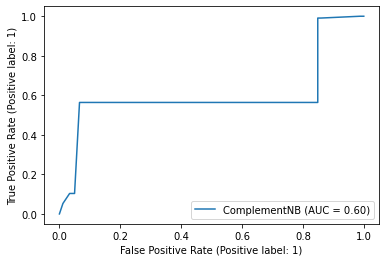

In [58]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import ComplementNB
from sklearn import metrics


NBC = ComplementNB()
NBC.fit(X_train, y_train)

prediction = NBC.predict(X_test)
prediction_train = NBC.predict(X_train)

y_pred = NBC.predict(X_test)

Precision = metrics.precision_score(y_train, prediction_train)
Accuracy = metrics.accuracy_score(y_train, prediction_train)
Sensitivity_recall = metrics.recall_score(y_train, prediction_train)
Specificity = metrics.recall_score(y_train, prediction_train, pos_label=0)
F1_score = metrics.f1_score(y_train, prediction_train)

print(f"Precision:",Precision)
print(f"Accuracy:",Accuracy)
print(f"Recall:",Sensitivity_recall)
print(f"Specificity:",Specificity)
print(f"F1_score:",F1_score)

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
TP2 = cm[0][0]
TN2 = cm[1][1]
FP2 = cm[0][1]
FN2 = cm[1][0]
print("TP :", TP2, " TN :", TN2, " FP :", FP2, " FN :", FN2 )
color = 'white'
matrix = plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Reds)
plt.show()

metrics.plot_roc_curve(NBC,X_test,y_test)
# area under the ROC shows represents how much the model is capable to distinguish between classes
# the higher the AUC value the better the model at classification
prob2 = NBC.predict_proba(X_test)[::,1]
auc2 = metrics.roc_auc_score(y_test,prob)
print("area under curve :", auc2)